In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\r\nWest Richard, CA ...",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,0787 Andrews Ranch Apt. 633\r\nSouth Chadburgh...,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\r\nBrendachester, ...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.shape

(500, 8)

In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
num_col = df._get_numeric_data()
num_col

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


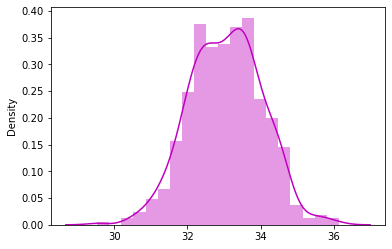

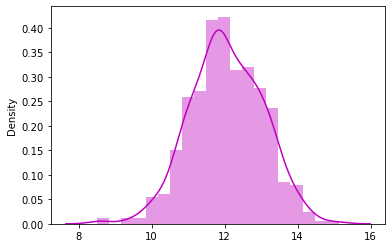

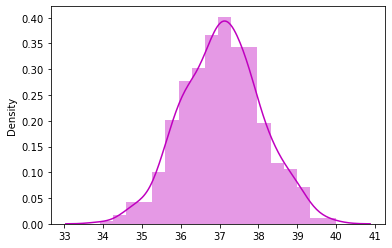

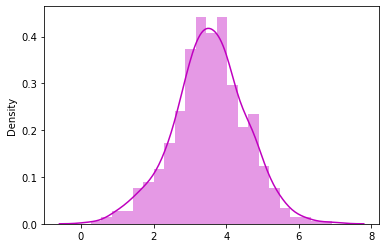

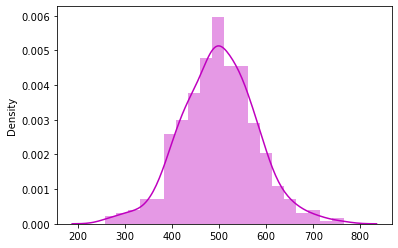

In [8]:
for col in num_col:
    sns.distplot(x=df[col], color='m')
    plt.show()

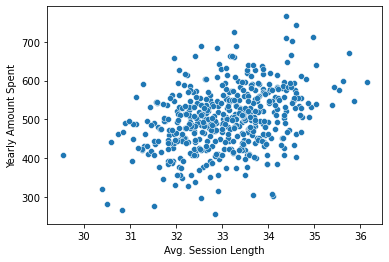

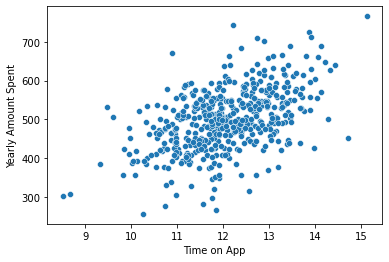

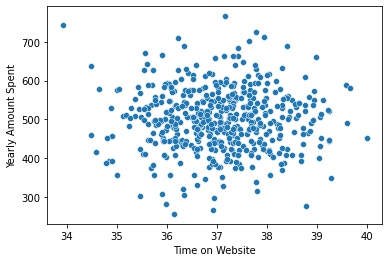

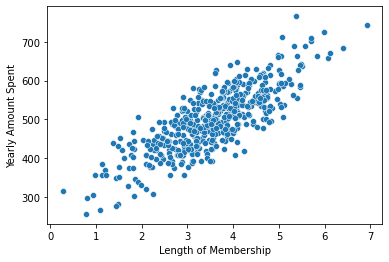

In [9]:
for col in num_col:
    if col != 'Yearly Amount Spent' :
        sns.scatterplot(x=df[col], y=df['Yearly Amount Spent'])
        plt.show()

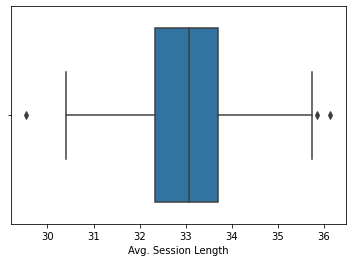

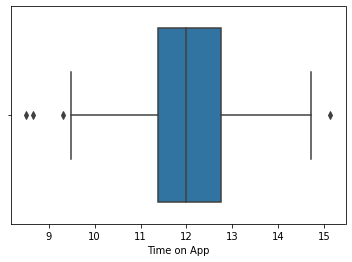

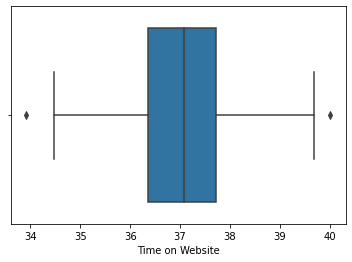

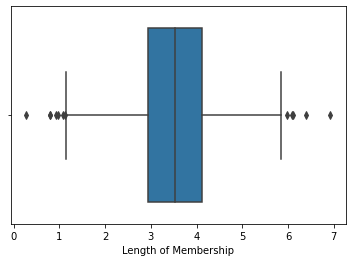

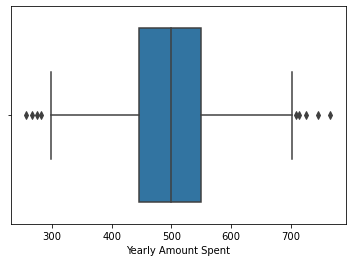

In [10]:
for col in num_col:
    sns.boxplot(x=df[col])
    plt.show()

In [36]:
from datasist.structdata import detect_outliers
outliers = detect_outliers(df,0, num_col)

In [39]:
df.drop(outliers, inplace=True)

In [40]:
len(outliers)

0

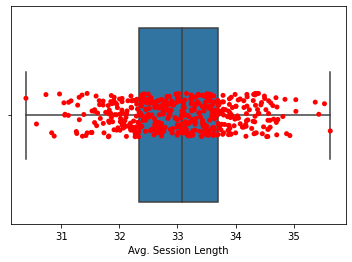

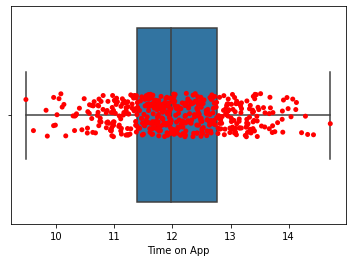

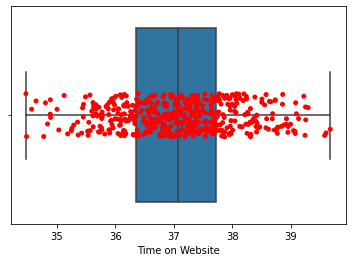

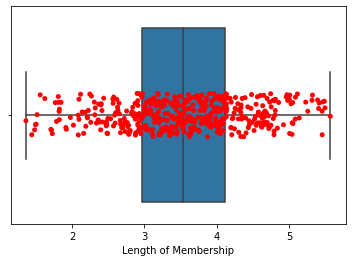

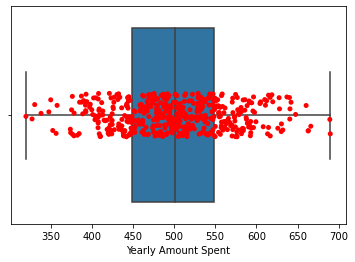

In [41]:
for col in num_col:
    sns.boxplot(x=df[col])
    sns.stripplot(x = df[col], color = 'red')
    plt.show()

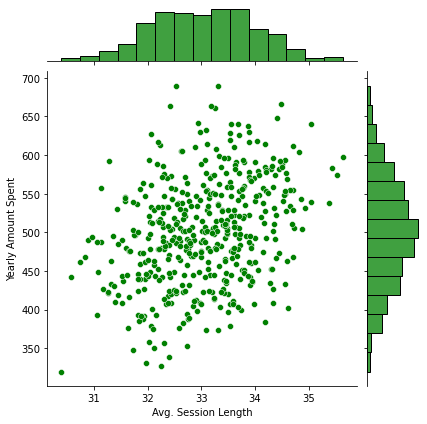

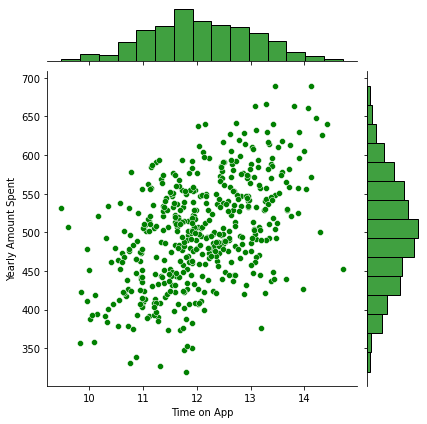

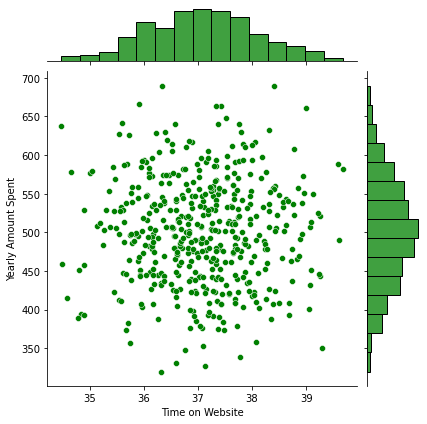

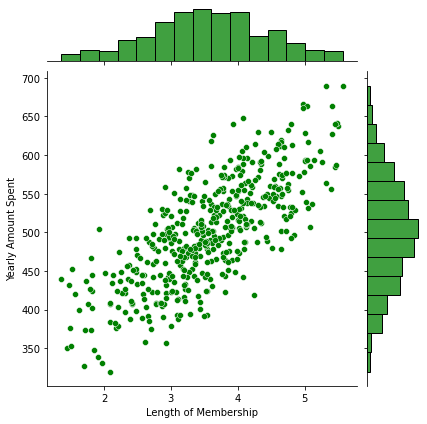

In [42]:
for col in num_col:
    if col != 'Yearly Amount Spent' :
        sns.jointplot(x=df[col], y=df['Yearly Amount Spent'], color='g')
        plt.show()

<AxesSubplot:>

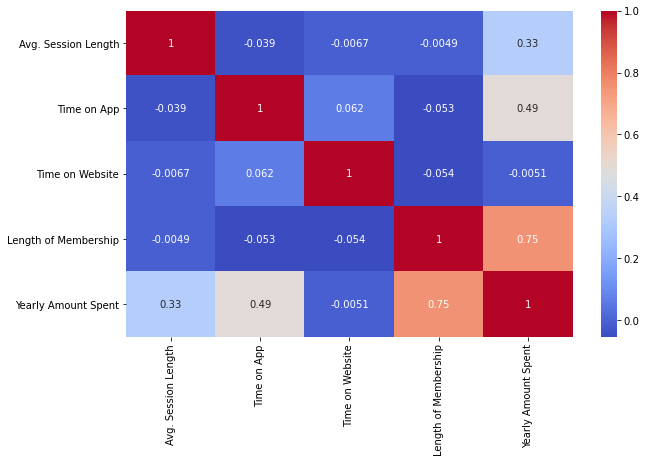

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Make Linear Regression Model

In [47]:
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [48]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 471, dtype: float64

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [53]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
df.shape

(471, 8)

In [55]:
models = {
    "LR": LinearRegression(),
    "KNNR": KNeighborsRegressor(),
    "SVC" : SVR(),
    "DT" : DecisionTreeRegressor(),
    "RF" : RandomForestRegressor(),
    "XGB" : XGBRegressor()}

for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  
    print('-'*30)

Using model: LR
Training Score: 0.9776618371796191
Test Score: 0.9802320678633051
------------------------------
Using model: KNNR
Training Score: 0.9394063407773257
Test Score: 0.9023677516477644
------------------------------
Using model: SVC
Training Score: 0.48819209526528917
Test Score: 0.44724727546624954
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.8846147345327071
------------------------------
Using model: RF
Training Score: 0.9908370540883905
Test Score: 0.9446277736974155
------------------------------
Using model: XGB
Training Score: 0.9999865061991629
Test Score: 0.9383757592743656
------------------------------
